In [1]:
# based on https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training label shape: ", y_train.shape) 
print("First 5 training labels: ", y_train[:5]) 

image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])


Using TensorFlow backend.


Training label shape:  (60000,)
First 5 training labels:  [5 0 4 1 9]


c:\users\galb\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


c:\users\galb\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
from keras.layers import Dense, Dropout # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/
import numpy as np

image_size = 784 # 28*28
num_classes = 10 # ten unique digits
layers_dims=[20,7,5,10]
p = 0.9 # for dropout

model = Sequential([
    Dense(units=20, input_shape=(image_size,), activation='relu', weights=[np.random.randn(image_size, 20)*np.sqrt(2/image_size), np.zeros(20)]),
    # Dropout(p),
    Dense(units=7, activation='relu', weights=[np.random.randn(20, 7)*np.sqrt(2/20), np.zeros(7)]),
     #Dropout(p),
    Dense(units=5, activation='relu', weights=[np.random.randn(7, 5)*np.sqrt(2/7), np.zeros(5)]),
     #Dropout(p),
    Dense(units=10, activation='softmax', weights=[np.random.randn(5, 10)*np.sqrt(1/5), np.zeros(10)]),
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_18 (Dense)             (None, 7)                 147       
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_20 (Dense)             (None, 10)                60        
Total params: 15,947
Trainable params: 15,947
Non-trainable params: 0
_________________________________________________________________


In [15]:
def evaluate(model, batch_size=128, epochs=5, lr=0.009):
    model.summary()
    model.compile(optimizer=keras.optimizers.SGD(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.2, verbose=True)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

    fig, axes = plt.subplots(1, 2)
    fig.set_figheight(7)
    fig.set_figwidth(14)

    # plot accuracy 
    axes[0].plot(history.history['acc'])
    axes[0].plot(history.history['val_acc'])
    axes[0].set_title('model accuracy')
    axes[0].set_ylabel('accuracy')
    axes[0].set_xlabel('epoch')
    axes[0].legend(['training', 'validation'], loc='best')

    # plot loss
    axes[1].plot(history.history['loss'])
    axes[1].plot(history.history['val_loss'])
    axes[1].set_title('model loss')
    axes[1].set_ylabel('accuracy')
    axes[1].set_xlabel('epoch')
    axes[1].legend(['training', 'validation'], loc='best')


    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_18 (Dense)             (None, 7)                 147       
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_20 (Dense)             (None, 10)                60        
Total params: 15,947
Trainable params: 15,947
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 3s 69us/step - loss: 1.6136 - acc: 0.4211 - val_loss: 1.1884 - val_acc: 0.5722
Epoch 2/40
48000/48000 [==============================] - 3s 57us/step - loss: 1.01

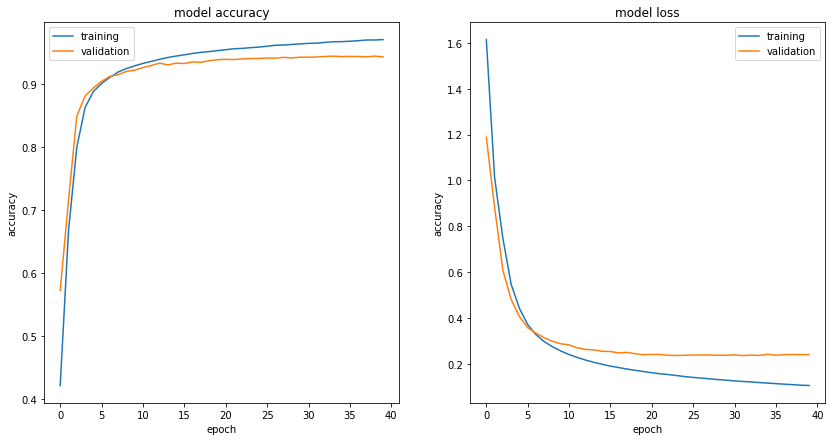

In [16]:
evaluate(model, batch_size=64, epochs=40)